In [ ]:

import os
os.environ['KAGGLE_USERNAME']="simransohal"
os.environ['KAGGLE_KEY']="3aa7697cd9a4ba2a3715c4a29c0f0cb6"

In [ ]:


!kaggle datasets download -d mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out

asl-rgb-depth-fingerspelling-spelling-it-out.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
with zipfile.ZipFile('asl-rgb-depth-fingerspelling-spelling-it-out.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.optim import Adam

import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt

import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time

In [ ]:
d=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
ls

asl-rgb-depth-fingerspelling-spelling-it-out.zip  dataset5/  sample_data/


In [ ]:
cd ..

/


In [ ]:
data_dir="/content/dataset5"
train_dir = "/content/train"
val_dir = "/content/validation"
test_dir = "/content/test"
train_size=0.8
test_size=0.2
validation_size=0.1

transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor()
])
data=datasets.ImageFolder(root=data_dir,transform=transforms)
dataset_size=len(data)
train_data=int(train_size*dataset_size)
test_data=int(test_size*dataset_size)
validation_data=dataset_size-(train_data+test_data)
train,test,validation=td.random_split(data,[train_data,test_data,validation_data])
data_loader_train = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
data_loader_test  = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)
data_loader_val   = torch.utils.data.DataLoader(validation, batch_size=64, shuffle=True)



In [ ]:
learning_rate = 0.001
num_epochs = 15
batch_size = 64

In [ ]:
!pip install torch torchvision --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchvision.models import shufflenet_v2_x1_0
import torchvision

d=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torchvision.models.shufflenet_v2_x1_0(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 24).to(d)
model=model.to(d)
criterion=nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)



/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
training_loss = []
validation_loss = []
training_accuracy = []
validation_accuracy = []

for epoch in range(num_epochs):
    running_training_loss = 0.0
    running_training_accuracy = 0.0
    model.train()
    for i, (inputs, labels) in enumerate(data_loader_train):
        optimizer.zero_grad()
        inputs = inputs.to(d)  
        labels = labels.to(d) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_training_loss += loss.item()
        if (i+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(data_loader_train)}], Loss: {loss.item()}')
        _, preds = torch.max(outputs, 1)
        running_training_accuracy += torch.sum(preds == labels.data)
    
    epoch_training_loss = running_training_loss / len(data_loader_train)
    epoch_training_accuracy = running_training_accuracy / len(data_loader_train.dataset)
    training_loss.append(epoch_training_loss)
    training_accuracy.append(epoch_training_accuracy)
    
    running_validation_loss = 0.0
    running_validation_accuracy = 0.0
    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loader_val):
            inputs = inputs.to(d)  
            labels = labels.to(d)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_validation_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_validation_accuracy += torch.sum(preds == labels.data)
    
    epoch_validation_loss = running_validation_loss / len(data_loader_val)
    epoch_validation_accuracy = running_validation_accuracy / len(data_loader_val.dataset)
    validation_loss.append(epoch_validation_loss)
    validation_accuracy.append(epoch_validation_accuracy)
    print('Epoch [{}/{}], Training Loss: {}, Training Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
          .format(epoch+1, num_epochs, epoch_training_loss, epoch_training_accuracy, epoch_validation_loss, epoch_validation_accuracy))
     


Epoch [1/15], Step [50/1646], Loss: 1.1250392198562622
Epoch [1/15], Step [100/1646], Loss: 0.675876796245575
Epoch [1/15], Step [150/1646], Loss: 0.514183759689331
Epoch [1/15], Step [200/1646], Loss: 0.5722936987876892
Epoch [1/15], Step [250/1646], Loss: 0.3607766926288605
Epoch [1/15], Step [300/1646], Loss: 0.4779268503189087
Epoch [1/15], Step [350/1646], Loss: 0.4882952570915222
Epoch [1/15], Step [400/1646], Loss: 0.32826146483421326
Epoch [1/15], Step [450/1646], Loss: 0.38200902938842773
Epoch [1/15], Step [500/1646], Loss: 0.23946644365787506
Epoch [1/15], Step [550/1646], Loss: 0.39003950357437134
Epoch [1/15], Step [600/1646], Loss: 0.24665150046348572
Epoch [1/15], Step [650/1646], Loss: 0.35030776262283325
Epoch [1/15], Step [700/1646], Loss: 0.3367694914340973
Epoch [1/15], Step [750/1646], Loss: 0.38280537724494934
Epoch [1/15], Step [800/1646], Loss: 0.3942956328392029
Epoch [1/15], Step [850/1646], Loss: 0.3997844457626343
Epoch [1/15], Step [900/1646], Loss: 0.24415

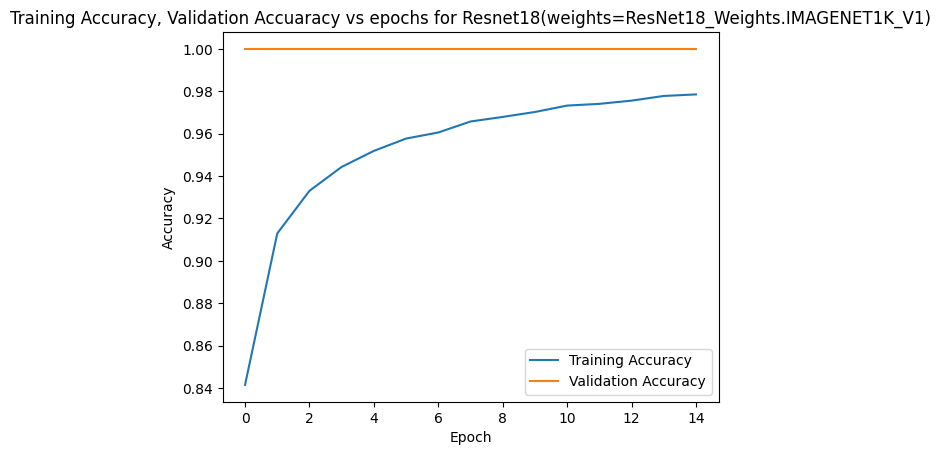

In [ ]:


training_accuracy_tensor = torch.tensor(training_accuracy)
validation_accuracy_tensor = torch.tensor(validation_accuracy)

plt.plot(training_accuracy_tensor.to('cpu'), label='Training Accuracy')
plt.plot(validation_accuracy_tensor.to('cpu'), label='Validation Accuracy')
plt.title('Training Accuracy, Validation Accuaracy vs epochs for Resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
     


Test Accuracy: 0.9704932973835112


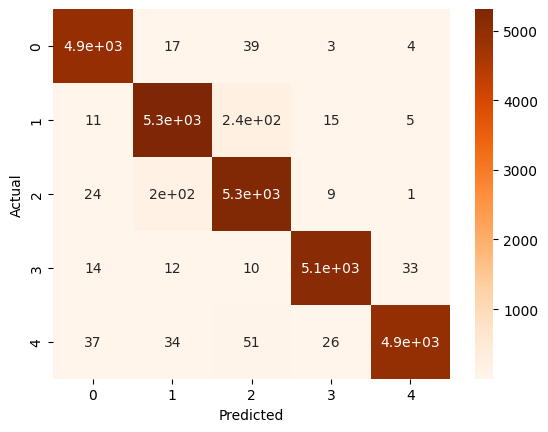

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4985
           1       0.95      0.95      0.95      5574
           2       0.94      0.96      0.95      5486
           3       0.99      0.99      0.99      5198
           4       0.99      0.97      0.98      5090

    accuracy                           0.97     26333
   macro avg       0.97      0.97      0.97     26333
weighted avg       0.97      0.97      0.97     26333



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

model.eval()
with torch.no_grad():
    test_preds = []
    test_labels = []
    for inputs, labels in data_loader_test:
        inputs = inputs.to(d)
        labels = labels.to(d)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.tolist())
        test_labels.extend(labels.tolist())

test_acc = accuracy_score(test_labels, test_preds)
print('Test Accuracy: {}'.format(test_acc))

#target_names = list(data_loader_train.class_to_idx.keys())
cm = confusion_matrix(test_labels, test_preds)
sns.heatmap(cm, annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(test_labels, test_preds))

     
